In [23]:
dengueLink="https://github.com/SocialAnalytics-StrategicIntelligence/DataInTables/raw/main/dengueSub.csv"

import pandas as pd
import os

dengue = pd.read_csv(dengueLink,parse_dates=["ano"],date_format="%Y")

In [24]:
dengue

,departamento,provincia,distrito,ano,semana,sexo,edad,enfermedad,case
0,HUANUCO,LEONCIO PRADO,LUYANDO,2000-01-01,47,M,9,SIN_SEÑALES_DE_ALARMA,1
1,HUANUCO,LEONCIO PRADO,LUYANDO,2000-01-01,40,F,18,SIN_SEÑALES_DE_ALARMA,1
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000-01-01,48,F,32,SIN_SEÑALES_DE_ALARMA,1
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000-01-01,37,F,40,SIN_SEÑALES_DE_ALARMA,1
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,2000-01-01,42,M,16,SIN_SEÑALES_DE_ALARMA,1
...,...,...,...,...,...,...,...,...,...
501231,SAN MARTIN,SAN MARTIN,TARAPOTO,2022-01-01,13,M,17,SIN_SEÑALES_DE_ALARMA,1
501232,PIURA,SECHURA,SECHURA,2022-01-01,13,F,48,SIN_SEÑALES_DE_ALARMA,1
501233,PIURA,PIURA,LA UNION,2022-01-01,52,M,24,SIN_SEÑALES_DE_ALARMA,1
501234,LORETO,MAYNAS,IQUITOS,2022-01-01,51,M,26,SIN_SEÑALES_DE_ALARMA,1


In [25]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501236 entries, 0 to 501235
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   departamento  501236 non-null  object        
 1   provincia     501236 non-null  object        
 2   distrito      501236 non-null  object        
 3   ano           501236 non-null  datetime64[ns]
 4   semana        501236 non-null  int64         
 5   sexo          501236 non-null  object        
 6   edad          501236 non-null  int64         
 7   enfermedad    501236 non-null  object        
 8   case          501236 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 34.4+ MB


In [26]:
dengue.ano.value_counts()

ano
2017-01-01    68279
2022-01-01    63214
2020-01-01    47932
2021-01-01    44791
2015-01-01    35816
2012-01-01    28505
2011-01-01    28084
2016-01-01    25160
2001-01-01    23526
2014-01-01    17234
2010-01-01    16842
2019-01-01    15287
2009-01-01    13407
2013-01-01    13092
2008-01-01    12824
2004-01-01     9547
2002-01-01     8086
2007-01-01     6344
2005-01-01     5640
2000-01-01     5557
2018-01-01     4698
2006-01-01     4022
2003-01-01     3349
Name: count, dtype: int64

In [27]:
dengue.enfermedad.value_counts()

enfermedad
SIN_SEÑALES_DE_ALARMA    443996
CON_SEÑALES_DE_ALARMA     54981
GRAVE                      2259
Name: count, dtype: int64

In [28]:
# dengue.groupby(['ano']).agg({'CON_SEÑALES_DE_ALARMA': 'sum','GRAVE':'sum','SIN_SEÑALES_DE_ALARMA':'sum'})

In [35]:
casosByYear=dengue.pivot_table(values='case',
                   index=['ano'],
                   columns='enfermedad',
                   aggfunc="sum")

casosByYear

enfermedad,CON_SEÑALES_DE_ALARMA,GRAVE,SIN_SEÑALES_DE_ALARMA
ano,,,
2000-01-01,NaN,NaN,5557.0
2001-01-01,NaN,250.0,23276.0
2002-01-01,1.0,14.0,8071.0
2003-01-01,NaN,15.0,3334.0
2004-01-01,NaN,34.0,9513.0
2005-01-01,NaN,15.0,5625.0
2006-01-01,NaN,4.0,4018.0
2007-01-01,NaN,35.0,6309.0
2008-01-01,NaN,35.0,12789.0


<Axes: xlabel='ano'>

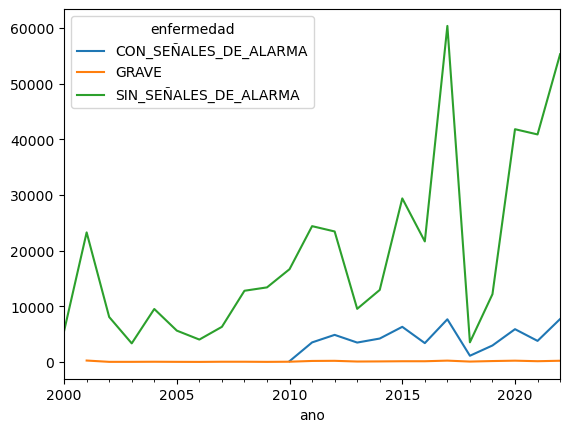

In [36]:
casosByYear.plot()

<Axes: xlabel='ano'>

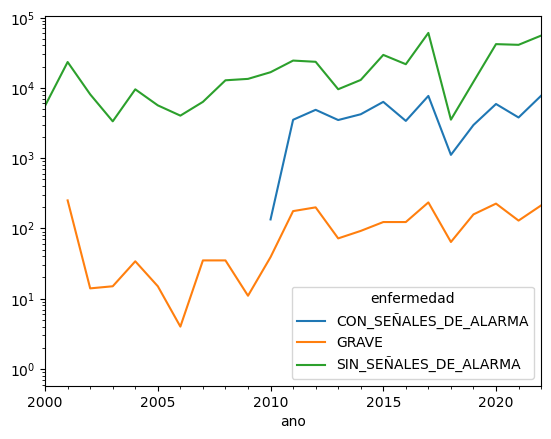

In [37]:
casosByYear.plot(logy=True)

In [39]:
meanAgeByYear=dengue.pivot_table(values='edad',
                   index=['ano'],
                   columns='enfermedad',
                   aggfunc="mean")
meanAgeByYear

enfermedad,CON_SEÑALES_DE_ALARMA,GRAVE,SIN_SEÑALES_DE_ALARMA
ano,,,
2000-01-01,NaN,NaN,28.412993
2001-01-01,NaN,31.444000,28.864195
2002-01-01,12.000000,21.928571,26.000991
2003-01-01,NaN,38.000000,28.550690
2004-01-01,NaN,23.794118,28.110901
2005-01-01,NaN,23.533333,26.305244
2006-01-01,NaN,13.500000,26.836237
2007-01-01,NaN,34.285714,28.008401
2008-01-01,NaN,27.342857,27.791540


<Axes: xlabel='ano'>

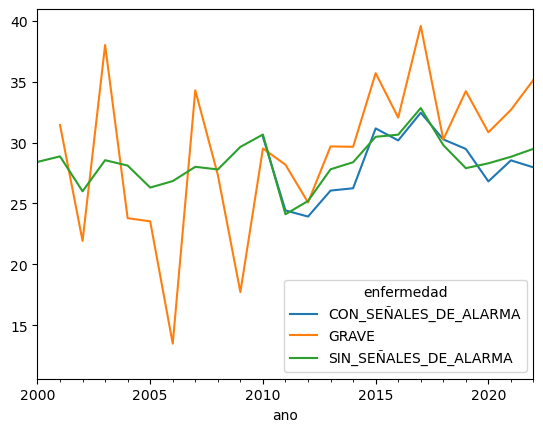

In [49]:
meanAgeByYear.plot()

/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


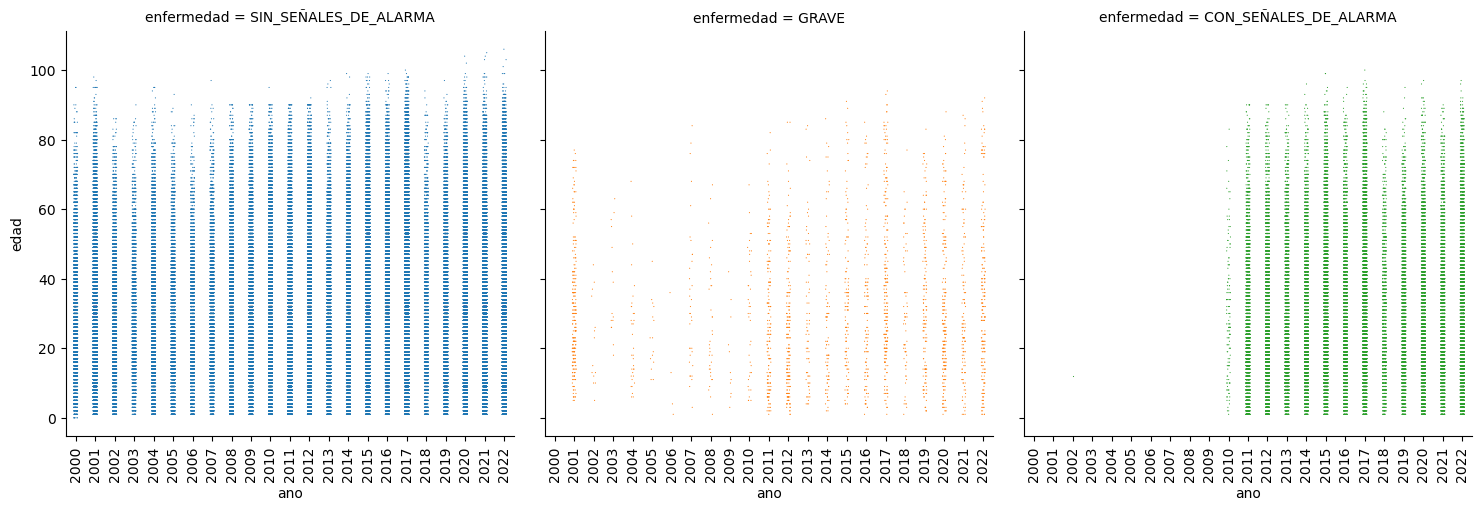

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt 

grid=sns.catplot(
    data=dengue, x=dengue.ano.dt.year, y="edad", col="enfermedad",hue="enfermedad",size=0.8,legend=False
)
for axes in grid.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


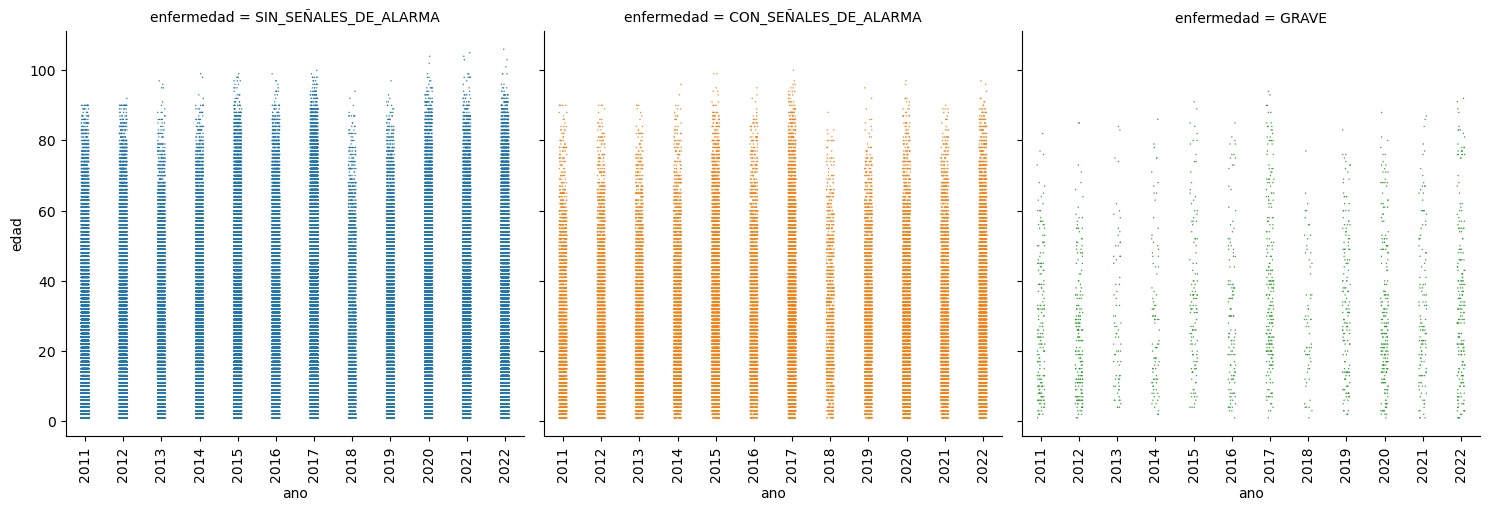

In [94]:
dengue2010plus=dengue[dengue.ano.dt.year>2010]

grid=sns.catplot(
    data=dengue2010plus, x=dengue2010plus.ano.dt.year, y="edad", col="enfermedad",hue="enfermedad",size=1,legend=False
)
for axes in grid.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


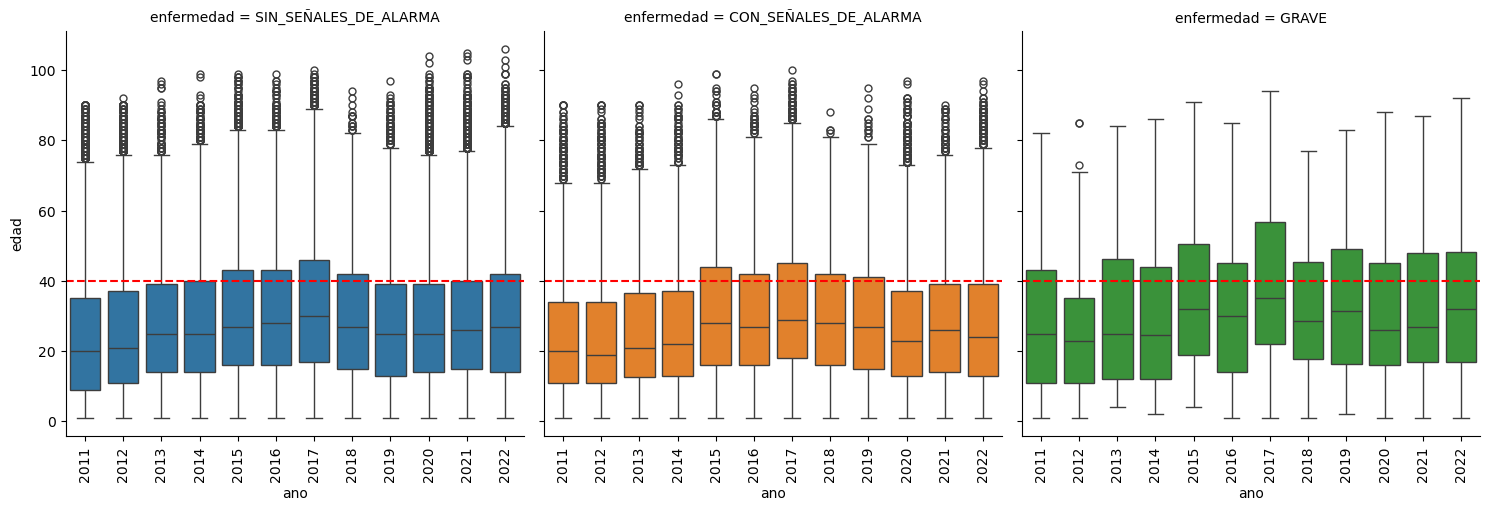

In [106]:
grid=sns.catplot(
    data=dengue2010plus, x=dengue2010plus.ano.dt.year, y="edad", col="enfermedad",hue="enfermedad",legend=False,
    kind='box'
)
grid.refline(y=40, color='red')
for axes in grid.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


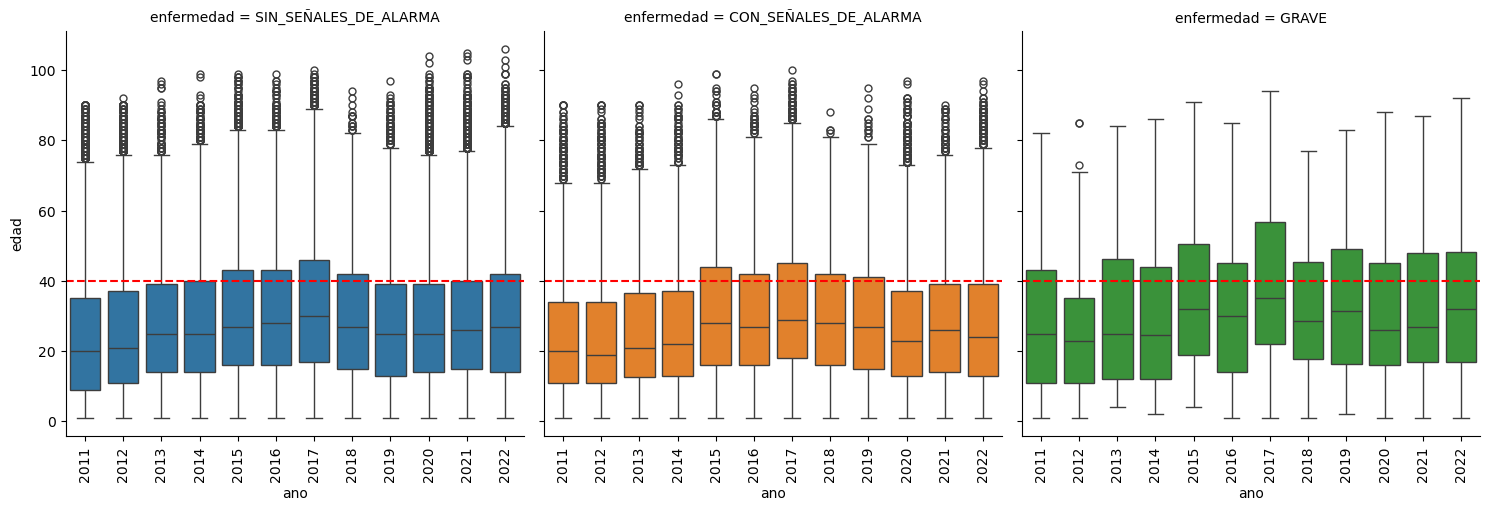

In [107]:
grid=sns.catplot(
    data=dengue2010plus, x=dengue2010plus.ano.dt.year, y="edad", col="enfermedad",hue="enfermedad",legend=False,
    kind='box'
)
grid.refline(y=40, color='red')
for axes in grid.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


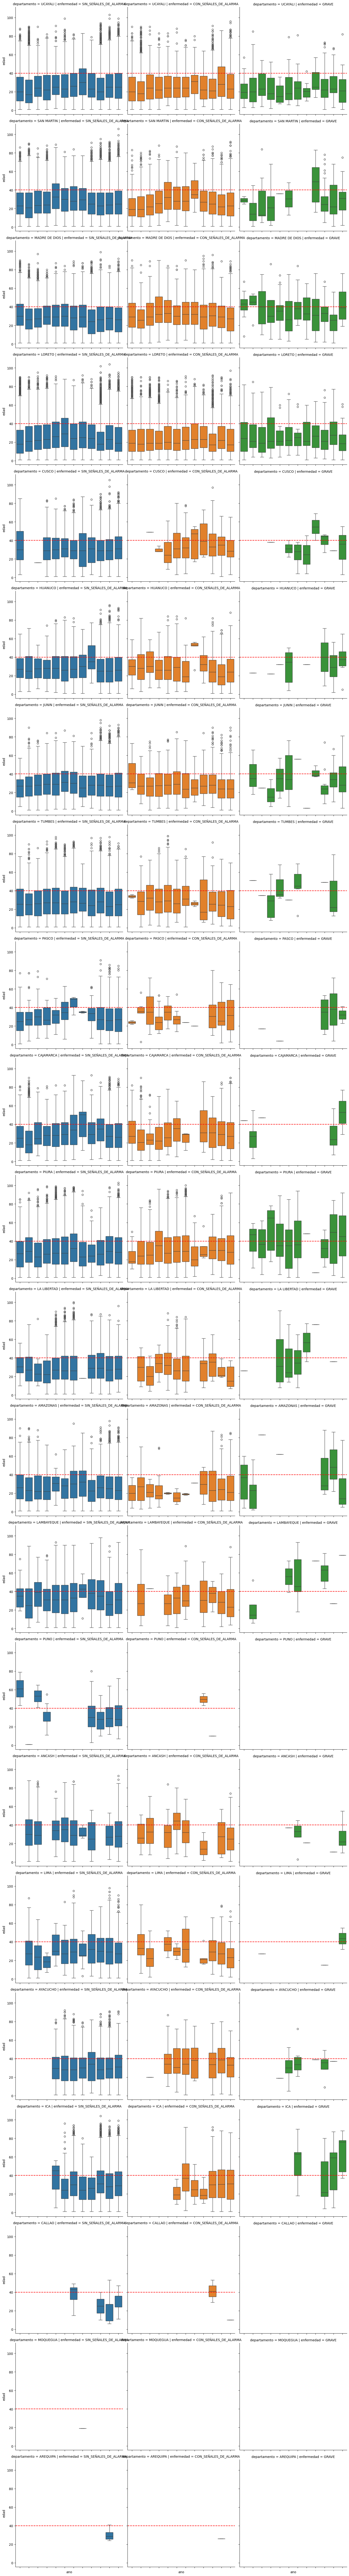

In [109]:
grid=sns.catplot(
    data=dengue2010plus, x=dengue2010plus.ano.dt.year, y="edad", col="enfermedad",hue="enfermedad",
    row="departamento",
    legend=False,
    kind='box'
)
grid.refline(y=40, color='red')
for axes in grid.axes.flat:
    axes.set_xticks(axes.get_xticks())
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


/Users/JoseManuel/opt/anaconda3/envs/SpatialDS_311_pandas2/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'FacetGrid' object has no attribute 'get_xticklabels'

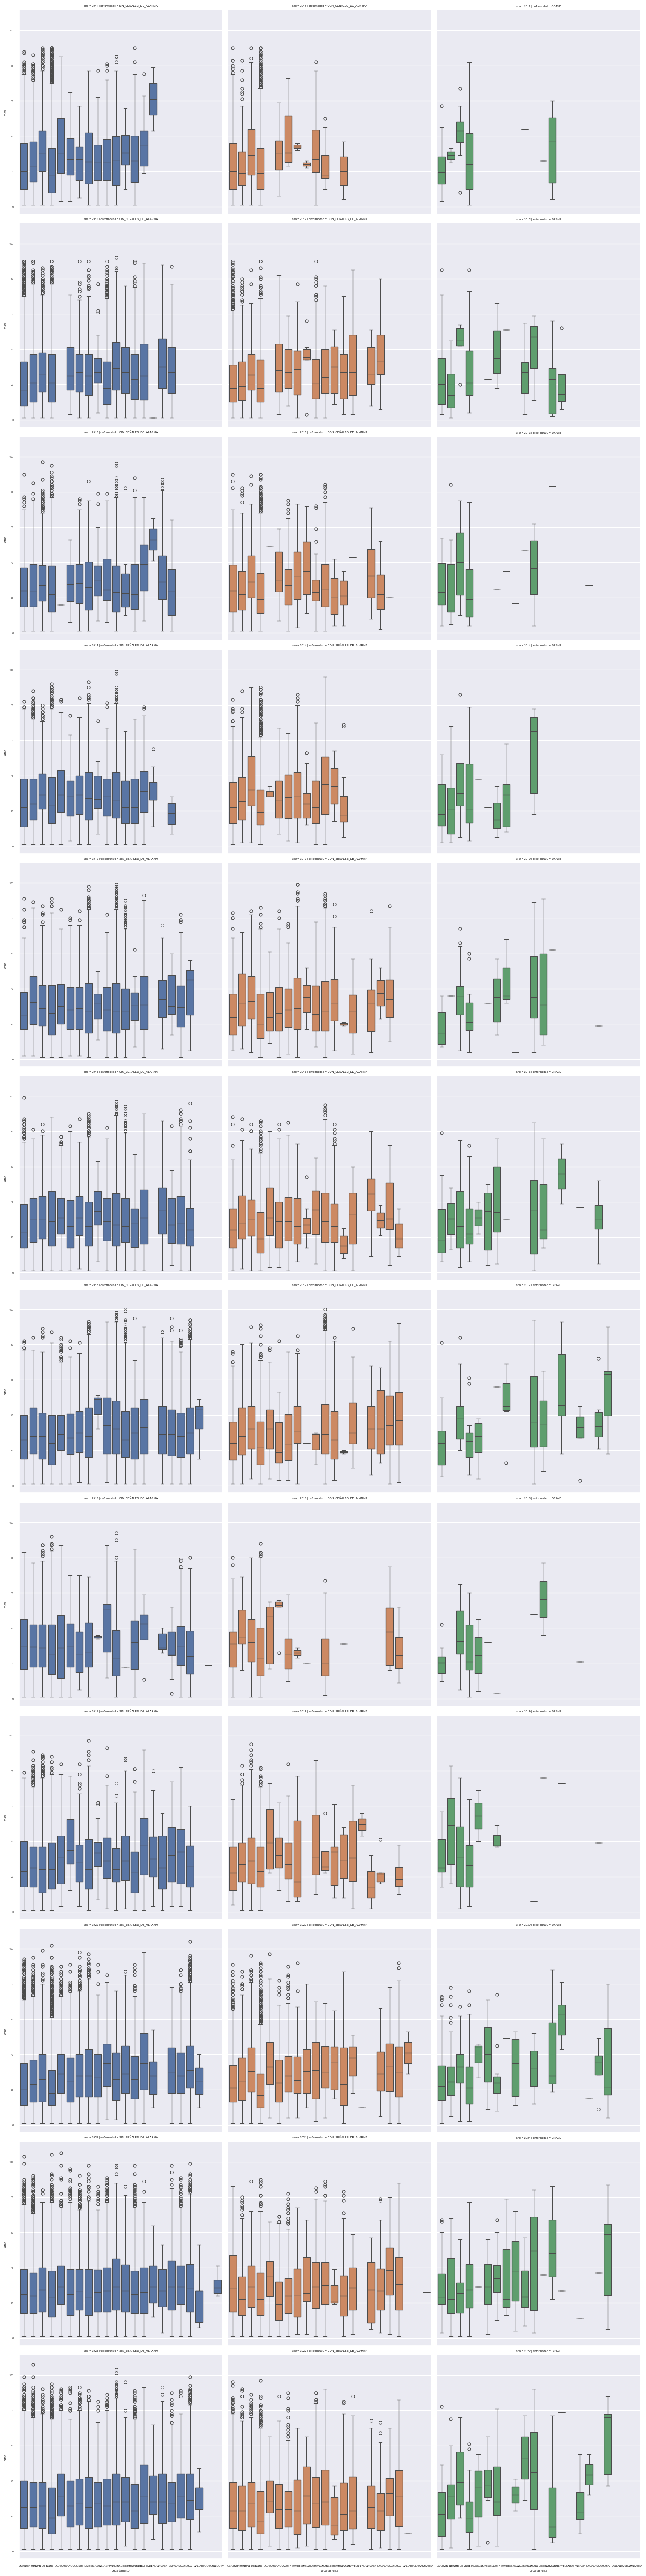

In [121]:
grid=sns.catplot(
    data=dengue2010plus, x="departamento", y="edad", col="enfermedad",hue="enfermedad",
    row=dengue2010plus.ano.dt.year,
    legend=False,
    kind='box'
)
#grid.set_xticklabels(size = 2,rotation=60)
grid.set_xticklabels(grid.get_xticklabels(), size = 3)
# for axes in grid.axes.flat:
#     axes.set_xticks(axes.get_xticks())
#     axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    

In [5]:
dengue.pivot_table(values='case',
                   index=['ano','semana','departamento','provincia','distrito'],
                   columns='enfermedad',
                   aggfunc="sum")

enfermedad                                                     CON_SEÑALES_DE_ALARMA  \
ano        semana departamento provincia        distrito                               
2000-01-01 1      LORETO       ALTO AMAZONAS    YURIMAGUAS                       NaN   
                               MAYNAS           IQUITOS                          NaN   
                  PIURA        MORROPON         CHULUCANAS                       NaN   
                  SAN MARTIN   MARISCAL CACERES JUANJUI                          NaN   
                  TUMBES       TUMBES           CORRALES                         NaN   
...                                                                              ...   
2022-01-01 52     UCAYALI      CORONEL PORTILLO MANANTAY                         5.0   
                                                MASISEA                          NaN   
                                                NUEVA REQUENA                    NaN   
                                                YARINACOCHA                      3.0   
                               PADRE ABAD       PADRE ABAD                       2.0   

enfermedad                                                     GRAVE  \
ano        semana departamento provincia        distrito               
2000-01-01 1      LORETO       ALTO AMAZONAS    YURIMAGUAS       NaN   
                               MAYNAS           IQUITOS          NaN   
                  PIURA        MORROPON         CHULUCANAS       NaN   
                  SAN MARTIN   MARISCAL CACERES JUANJUI          NaN   
                  TUMBES       TUMBES           CORRALES         NaN   
...                                                              ...   
2022-01-01 52     UCAYALI      CORONEL PORTILLO MANANTAY         NaN   
                                                MASISEA          NaN   
                                                NUEVA REQUENA    NaN   
                                                YARINACOCHA      NaN   
                               PADRE ABAD       PADRE ABAD       NaN   

enfermedad                                                     SIN_SEÑALES_DE_ALARMA  
ano        semana departamento provincia        distrito                              
2000-01-01 1      LORETO       ALTO AMAZONAS    YURIMAGUAS                       3.0  
                               MAYNAS           IQUITOS                          7.0  
                  PIURA        MORROPON         CHULUCANAS                       1.0  
                  SAN MARTIN   MARISCAL CACERES JUANJUI                          1.0  
                  TUMBES       TUMBES           CORRALES                         2.0  
...                                                                              ...  
2022-01-01 52     UCAYALI      CORONEL PORTILLO MANANTAY                        37.0  
                                                MASISEA                          1.0  
                                                NUEVA REQUENA                    8.0  
                                                YARINACOCHA                     48.0  
                               PADRE ABAD       PADRE ABAD                       5.0  

[56282 rows x 3 columns]

In [34]:
dengue_estado_dist=dengue.pivot_table(values='case',
                                 index=['ano','departamento','provincia','distrito'],
                                 columns='enfermedad',
                                 aggfunc="sum").reset_index()

dengue_estado_dist.head()

enfermedad,ano,departamento,provincia,distrito,CON_SEÑALES_DE_ALARMA,GRAVE,SIN_SEÑALES_DE_ALARMA
0,2000-01-01,AMAZONAS,BAGUA,BAGUA,NaN,NaN,280.0
1,2000-01-01,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,NaN,NaN,40.0
2,2000-01-01,AMAZONAS,UTCUBAMBA,CAJARURO,NaN,NaN,5.0
3,2000-01-01,AMAZONAS,UTCUBAMBA,CUMBA,NaN,NaN,15.0
4,2000-01-01,AMAZONAS,UTCUBAMBA,YAMON,NaN,NaN,1.0


In [35]:
dengue_estado_dist.fillna(0,inplace=True)
dengue_estado_dist

enfermedad,ano,departamento,provincia,distrito,CON_SEÑALES_DE_ALARMA,GRAVE,SIN_SEÑALES_DE_ALARMA
0,2000-01-01,AMAZONAS,BAGUA,BAGUA,0.0,0.0,280.0
1,2000-01-01,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,0.0,0.0,40.0
2,2000-01-01,AMAZONAS,UTCUBAMBA,CAJARURO,0.0,0.0,5.0
3,2000-01-01,AMAZONAS,UTCUBAMBA,CUMBA,0.0,0.0,15.0
4,2000-01-01,AMAZONAS,UTCUBAMBA,YAMON,0.0,0.0,1.0
...,...,...,...,...,...,...,...
4900,2022-01-01,UCAYALI,PADRE ABAD,HUIPOCA,1.0,0.0,5.0
4901,2022-01-01,UCAYALI,PADRE ABAD,IRAZOLA,6.0,1.0,54.0
4902,2022-01-01,UCAYALI,PADRE ABAD,NESHUYA,16.0,0.0,55.0
4903,2022-01-01,UCAYALI,PADRE ABAD,PADRE ABAD,47.0,1.0,268.0


In [39]:
dengue_estado_dist.GRAVE.describe()

count    4905.000000
mean        0.460550
std         2.616246
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        84.000000
Name: GRAVE, dtype: float64

In [38]:
dengue_estado_dist.CON_SEÑALES_DE_ALARMA.describe()

count    4905.000000
mean       11.209786
std        63.237552
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      1606.000000
Name: CON_SEÑALES_DE_ALARMA, dtype: float64

In [41]:
dengue_estado_prov=dengue.pivot_table(values='case',
                                 index=['ano','departamento','provincia'],
                                 columns='enfermedad',
                                 aggfunc="sum").reset_index()
dengue_estado_prov.fillna(0,inplace=True)
dengue_estado_prov.head()

enfermedad,ano,departamento,provincia,CON_SEÑALES_DE_ALARMA,GRAVE,SIN_SEÑALES_DE_ALARMA
0,2000-01-01,AMAZONAS,BAGUA,0.0,0.0,280.0
1,2000-01-01,AMAZONAS,UTCUBAMBA,0.0,0.0,61.0
2,2000-01-01,CAJAMARCA,CUTERVO,0.0,0.0,2.0
3,2000-01-01,CAJAMARCA,JAEN,0.0,0.0,16.0
4,2000-01-01,HUANUCO,LEONCIO PRADO,0.0,0.0,29.0


In [42]:
dengue_estado_prov.GRAVE.describe()

count    1310.000000
mean        1.724427
std         7.328874
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       124.000000
Name: GRAVE, dtype: float64

In [43]:
dengue_estado.groupby(['ano']).agg({'CON_SEÑALES_DE_ALARMA': 'sum','GRAVE':'sum','SIN_SEÑALES_DE_ALARMA':'sum'})

enfermedad,CON_SEÑALES_DE_ALARMA,GRAVE,SIN_SEÑALES_DE_ALARMA
ano,,,
2000-01-01,0.0,0.0,5557.0
2001-01-01,0.0,250.0,23276.0
2002-01-01,1.0,14.0,8071.0
2003-01-01,0.0,15.0,3334.0
2004-01-01,0.0,34.0,9513.0
2005-01-01,0.0,15.0,5625.0
2006-01-01,0.0,4.0,4018.0
2007-01-01,0.0,35.0,6309.0
2008-01-01,0.0,35.0,12789.0


<Axes: xlabel='ano'>

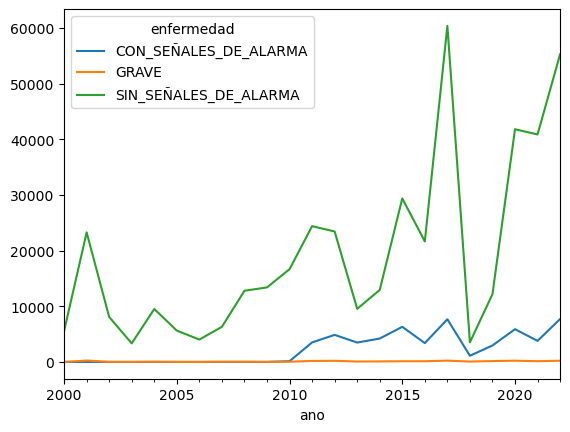

In [44]:
dengue_estado_year=dengue_estado.groupby(['ano']).agg({'CON_SEÑALES_DE_ALARMA': 'sum','GRAVE':'sum','SIN_SEÑALES_DE_ALARMA':'sum'})
dengue_estado_year.plot()

<Axes: xlabel='ano'>

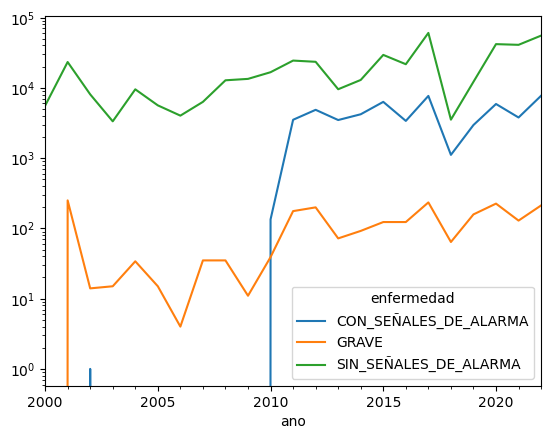

In [45]:
dengue_estado_year.plot(logy=True)

In [46]:
dengue_estado.groupby(['ano','departamento','provincia']).agg({'CON_SEÑALES_DE_ALARMA': 'sum'})

enfermedad                                CON_SEÑALES_DE_ALARMA
ano        departamento provincia                              
2000-01-01 AMAZONAS     BAGUA                               0.0
                        UTCUBAMBA                           0.0
           CAJAMARCA    CUTERVO                             0.0
                        JAEN                                0.0
           HUANUCO      LEONCIO PRADO                       0.0
...                                                         ...
2022-01-01 TUMBES       ZARUMILLA                           5.0
           UCAYALI      ATALAYA                            96.0
                        CORONEL PORTILLO                  512.0
                        PADRE ABAD                         87.0
                        PURUS                               1.0

[1310 rows x 1 columns]

In [48]:
dengue_estado.groupby(['ano','departamento','provincia']).agg({'CON_SEÑALES_DE_ALARMA': 'sum'}).\
reset_index()

enfermedad,ano,departamento,provincia,CON_SEÑALES_DE_ALARMA
0,2000-01-01,AMAZONAS,BAGUA,0.0
1,2000-01-01,AMAZONAS,UTCUBAMBA,0.0
2,2000-01-01,CAJAMARCA,CUTERVO,0.0
3,2000-01-01,CAJAMARCA,JAEN,0.0
4,2000-01-01,HUANUCO,LEONCIO PRADO,0.0
...,...,...,...,...
1305,2022-01-01,TUMBES,ZARUMILLA,5.0
1306,2022-01-01,UCAYALI,ATALAYA,96.0
1307,2022-01-01,UCAYALI,CORONEL PORTILLO,512.0
1308,2022-01-01,UCAYALI,PADRE ABAD,87.0


In [49]:
dengue_estado_place_year=dengue_estado.groupby(['ano','departamento','provincia']).\
agg({'CON_SEÑALES_DE_ALARMA': 'sum'}).\
reset_index()

dengue_estado_place_year

enfermedad,ano,departamento,provincia,CON_SEÑALES_DE_ALARMA
0,2000-01-01,AMAZONAS,BAGUA,0.0
1,2000-01-01,AMAZONAS,UTCUBAMBA,0.0
2,2000-01-01,CAJAMARCA,CUTERVO,0.0
3,2000-01-01,CAJAMARCA,JAEN,0.0
4,2000-01-01,HUANUCO,LEONCIO PRADO,0.0
...,...,...,...,...
1305,2022-01-01,TUMBES,ZARUMILLA,5.0
1306,2022-01-01,UCAYALI,ATALAYA,96.0
1307,2022-01-01,UCAYALI,CORONEL PORTILLO,512.0
1308,2022-01-01,UCAYALI,PADRE ABAD,87.0


In [50]:
where = dengue_estado_place_year.groupby(['ano','departamento'])['CON_SEÑALES_DE_ALARMA'].idxmax()
worst_prov_year = dengue_estado_place_year.loc[where].reset_index(drop=True)
worst_prov_year

enfermedad,ano,departamento,provincia,CON_SEÑALES_DE_ALARMA
0,2000-01-01,AMAZONAS,BAGUA,0.0
1,2000-01-01,CAJAMARCA,CUTERVO,0.0
2,2000-01-01,HUANUCO,LEONCIO PRADO,0.0
3,2000-01-01,JUNIN,CHANCHAMAYO,0.0
4,2000-01-01,LA LIBERTAD,TRUJILLO,0.0
...,...,...,...,...
366,2022-01-01,PIURA,PIURA,710.0
367,2022-01-01,PUNO,CARABAYA,0.0
368,2022-01-01,SAN MARTIN,SAN MARTIN,359.0
369,2022-01-01,TUMBES,TUMBES,28.0


In [51]:
worst_prov_year.departamento.value_counts()

departamento
AMAZONAS         23
HUANUCO          23
JUNIN            23
LORETO           23
PIURA            23
SAN MARTIN       23
TUMBES           23
UCAYALI          23
CAJAMARCA        23
LA LIBERTAD      22
LAMBAYEQUE       22
MADRE DE DIOS    21
PASCO            19
ANCASH           19
LIMA             17
CUSCO            13
AYACUCHO          9
PUNO              8
ICA               8
CALLAO            4
MOQUEGUA          1
AREQUIPA          1
Name: count, dtype: int64

In [56]:
provByDep=pd.crosstab(index=worst_prov_year["provincia"], 
                      columns=worst_prov_year["departamento"],margins=True)
provByDep

departamento,AMAZONAS,ANCASH,AREQUIPA,AYACUCHO,CAJAMARCA,CALLAO,CUSCO,HUANUCO,ICA,JUNIN,...,LORETO,MADRE DE DIOS,MOQUEGUA,PASCO,PIURA,PUNO,SAN MARTIN,TUMBES,UCAYALI,All
provincia,,,,,,,,,,,,,,,,,,,,,
ALTO AMAZONAS,0,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,10
AREQUIPA,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ASCOPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
ATALAYA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,10
AYABACA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,5
BAGUA,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
BELLAVISTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,10
CAJAMARCA,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CALLAO,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [62]:
provByDep.sort_values('All',axis=0,inplace=True)
provByDep.sort_values('All',axis=1,inplace=True)
provByDep

departamento,AREQUIPA,MOQUEGUA,CALLAO,ICA,PUNO,AYACUCHO,CUSCO,LIMA,ANCASH,PASCO,...,TUMBES,SAN MARTIN,PIURA,AMAZONAS,UCAYALI,JUNIN,HUANUCO,CAJAMARCA,LORETO,All
provincia,,,,,,,,,,,,,,,,,,,,,
HUALLAGA,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
AREQUIPA,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
PACASMAYO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
NAZCA,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MARISCAL NIETO,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CAJAMARCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
SUCRE,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
GRAN CHIMU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ZARUMILLA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


<Axes: xlabel='departamento', ylabel='provincia'>

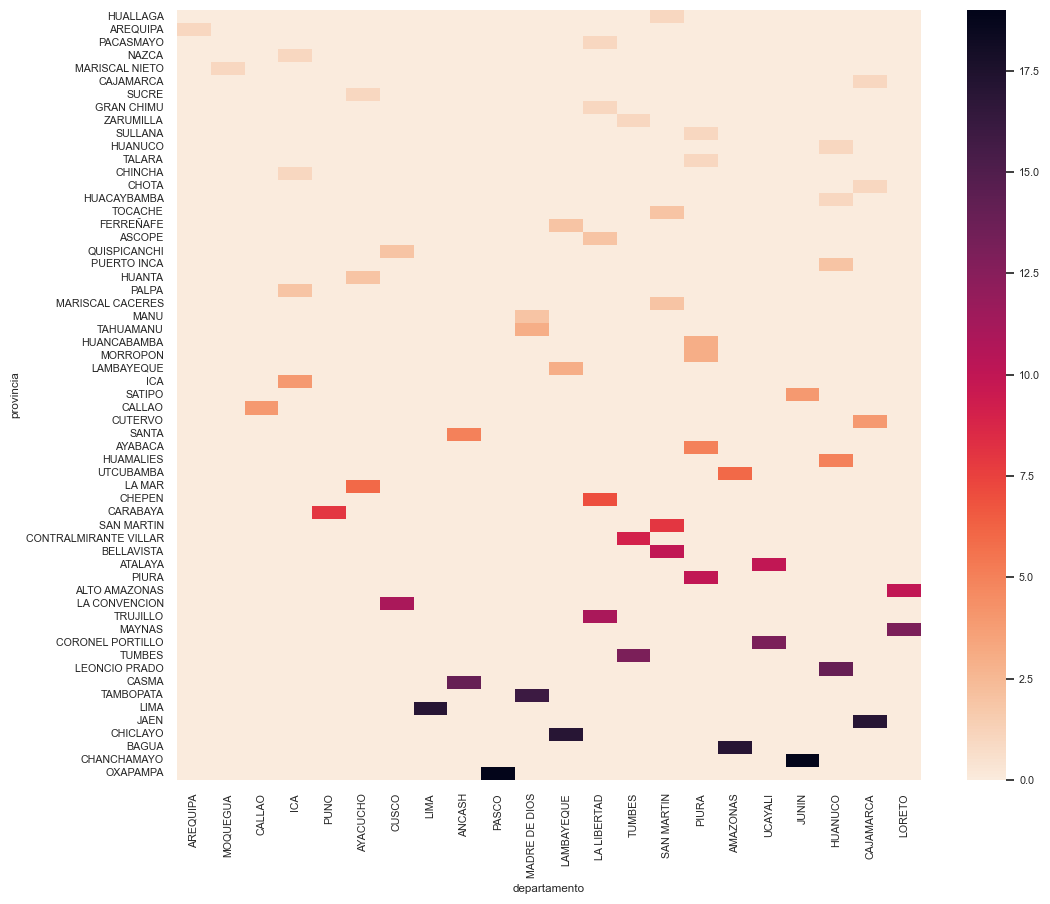

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(12,10))
sns.set(font_scale=0.7)

sns.heatmap(provByDep.iloc[0:-1,0:-1],
            cmap=sns.cm.rocket_r,
            yticklabels=1,
            ax=ax)